<a href="https://colab.research.google.com/github/aasthadawar02/Sample/blob/main/Kaggle_Dataset_Mobile_V2_vs_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import tensorflow_datasets as tfds
import pandas as pd

In [2]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import accuracy_score

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
train_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/train"

train_data = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                         validation_split=None,
                                                         image_size=(128, 128),
                                                         batch_size=16)

Found 2339 files belonging to 10 classes.


In [5]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
validation_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/valid"
validation_data = tf.keras.utils.image_dataset_from_directory(validation_directory,
                                                         validation_split=None,
                                                         image_size=(128, 128),
                                                         batch_size=16)

Found 50 files belonging to 10 classes.


In [7]:
validation_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
test_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_directory,
                                                         validation_split=None,
                                                         image_size=(128, 128),
                                                         batch_size=16)

Found 50 files belonging to 10 classes.


In [9]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [11]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

feature_extractor = hub.KerasLayer(model_handle,
                                   trainable=True)
num_class = 10
model = tf.keras.Sequential(
    [
        normalization_layer,
        feature_extractor,
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 128, 128, 3])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 10)                10020     
                                                                 
Total params: 1702509 (6.49 MB)
Trainable params: 1688429 (6.44 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [13]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
EPOCHS = 25
history = model.fit(train_data,
                    epochs=EPOCHS,
                    validation_data=validation_data)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


147/147 [==============================] - 51s 239ms/step - loss: 2.0433 - accuracy: 0.6045 - val_loss: 5.7153 - val_accuracy: 0.4000
Epoch 2/25
147/147 [==============================] - 35s 235ms/step - loss: 0.8108 - accuracy: 0.7794 - val_loss: 1.7570 - val_accuracy: 0.6400
Epoch 3/25
147/147 [==============================] - 36s 243ms/step - loss: 0.6228 - accuracy: 0.8247 - val_loss: 1.2312 - val_accuracy: 0.7600
Epoch 4/25
147/147 [==============================] - 34s 227ms/step - loss: 0.5563 - accuracy: 0.8478 - val_loss: 0.7516 - val_accuracy: 0.8000
Epoch 5/25
147/147 [==============================] - 34s 233ms/step - loss: 0.5808 - accuracy: 0.8516 - val_loss: 1.1412 - val_accuracy: 0.6800
Epoch 6/25
147/147 [==============================] - 35s 235ms/step - loss: 0.4439 - accuracy: 0.8820 - val_loss: 0.5264 - val_accuracy: 0.8600
Epoch 7/25
147/147 [==============================] - 35s 236ms/step - loss: 0.3600 - accuracy: 0.9175 - val_loss: 1.0213 - val_accuracy: 0.7

4/4 [==============================] - 0s 30ms/step - loss: 0.4779 - accuracy: 0.8600


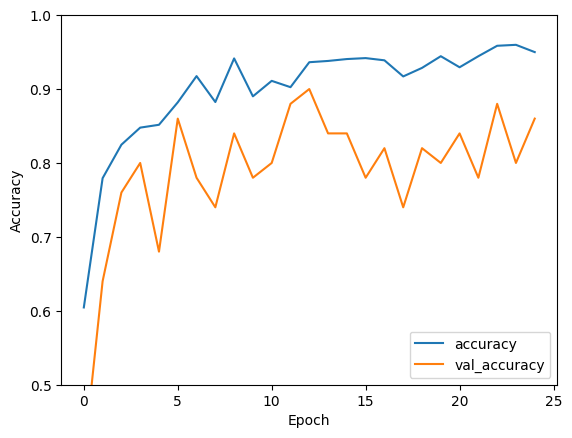

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_data)

In [16]:
print(test_acc)

0.8600000143051147


In [17]:
images=[]
labels=[]
for image, label in test_data:
  images.extend(image.numpy())
  labels.extend(label.numpy())
predicted_labels = model.predict(np.array(images))
predicted_labels = list(map(lambda val : np.argmax(val), predicted_labels))
len(predicted_labels)

2/2 [==============================] - 1s 40ms/step


50

In [18]:
len(predicted_labels)

50

In [19]:
num_classes =train_data.class_names

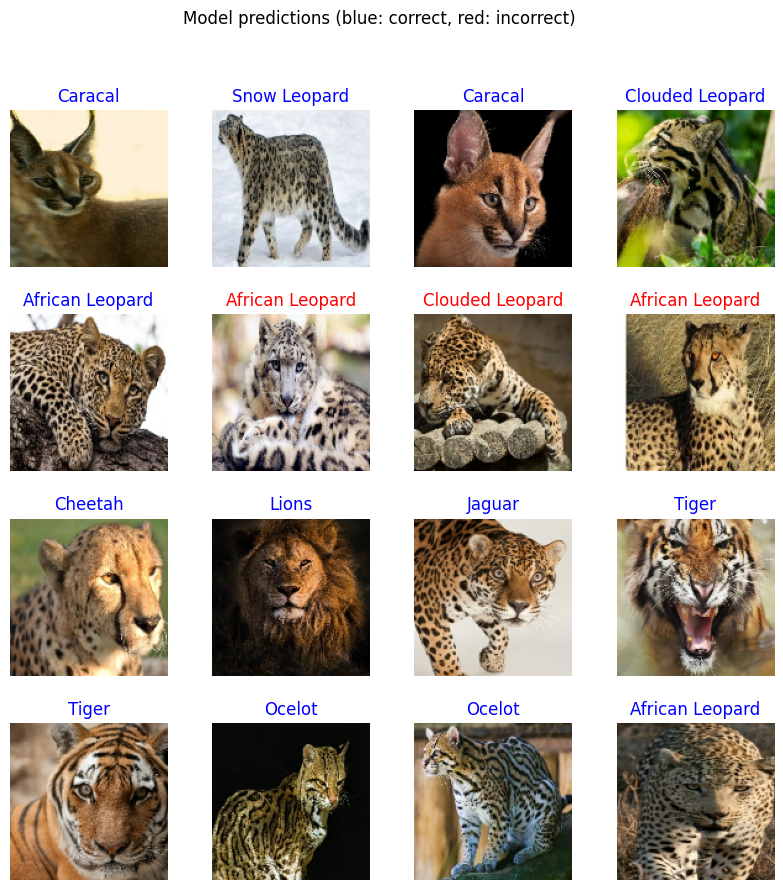

In [20]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(images[i].astype("uint8"))
    color = "blue" if predicted_labels[i] == labels[i] else "red"
    plt.title(num_classes[predicted_labels[i]].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [22]:
print(classification_report(labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      1.00      1.00         5
           2       1.00      0.60      0.75         5
           3       0.71      1.00      0.83         5
           4       1.00      0.80      0.89         5
           5       0.80      0.80      0.80         5
           6       1.00      0.80      0.89         5
           7       0.71      1.00      0.83         5
           8       1.00      0.40      0.57         5
           9       1.00      1.00      1.00         5

    accuracy                           0.84        50
   macro avg       0.89      0.84      0.83        50
weighted avg       0.89      0.84      0.83        50



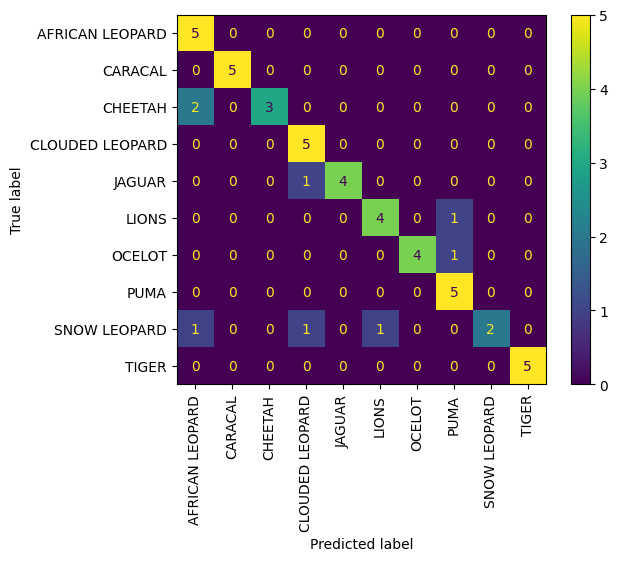

In [23]:
ConfusionMatrixDisplay.from_predictions(labels, predicted_labels, display_labels=num_classes, xticks_rotation="vertical")
plt.show()

In [24]:
train_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/train"

train_data = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                         validation_split=None,
                                                         image_size=(224, 224),
                                                         batch_size=16)

Found 2339 files belonging to 10 classes.


In [25]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
validation_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/valid"
validation_data = tf.keras.utils.image_dataset_from_directory(validation_directory,
                                                         validation_split=None,
                                                         image_size=(224, 224),
                                                         batch_size=16)

Found 50 files belonging to 10 classes.


In [27]:
validation_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
test_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Big_Cats_Kaggle/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_directory,
                                                         validation_split=None,
                                                         image_size=(224, 224),
                                                         batch_size=16)

Found 50 files belonging to 10 classes.


In [29]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [31]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v3/frameworks/TensorFlow2/variations/large-075-224-classification/versions/1"


num_class = 10
model = tf.keras.Sequential(
    [
        normalization_layer,
        hub.KerasLayer(model_handle,
                                   trainable=True),
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 224, 224, 3])

SyntaxError: ignored

In [ ]:
model.summary()

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
EPOCHS = 25
history = model.fit(train_data,
                    epochs=EPOCHS,
                    validation_data=validation_data)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_data)

In [ ]:
print(test_acc)

In [ ]:
images=[]
labels=[]
for image, label in test_data:
  images.extend(image.numpy())
  labels.extend(label.numpy())
predicted_labels = model.predict(np.array(images))
predicted_labels = list(map(lambda val : np.argmax(val), predicted_labels))
len(predicted_labels)

In [ ]:
len(predicted_labels)

In [ ]:
num_classes =train_data.class_names

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(images[i].astype("uint8"))
    color = "blue" if predicted_labels[i] == labels[i] else "red"
    plt.title(num_classes[predicted_labels[i]].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [ ]:
print(classification_report(labels,predicted_labels))

In [ ]:
ConfusionMatrixDisplay.from_predictions(labels, predicted_labels, display_labels=num_classes, xticks_rotation="vertical")
plt.show()